## Count words in the text of War and Peace
We then take the top 25 words and plot their counts in a bar chart. 

One of the benefits of using PySpark is that you have access to the complete Python ecosystem for scientific computing and visualization. You can run transformations in a scalable manner using Spark and still retain key Python code for tasks such as visualization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random
import re
%matplotlib inline


In [2]:
# remove words that we typically do not want to worry about
def is_stop_word(word, stop_words):
    return True if word.lower() in stop_words.value else False

stop_words = sc.broadcast(["a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the"]);

# Spark code to perform the actual transformations
# Text is stored on HDFS
lines = sc.textFile("/Data/WarPeace.txt")
top_words = lines.flatMap(lambda x: re.sub("[,:.!'\"]", "", x).split(' '))\
                  .map(lambda x: (x.lower(), 1) if len(x.strip())> 0 and not is_stop_word(x, stop_words) else (x, 0))\
                  .reduceByKey(lambda x, y: x + y)\
                  .takeOrdered(25, key = lambda x: -x[1])

for (word, count) in top_words:\
    print("{}: {}".format(word, count))

i: 4068
said: 2828
prince: 1864
pierre: 1767
did: 1475
natasha: 1079
man: 1044
andrew: 1023
time: 907
princess: 903
face: 888
went: 859
french: 858
know: 825
eyes: 816
old: 801
thought: 762
men: 754
room: 749
chapter: 732
like: 728
began: 712
rostov: 706
came: 681
moscow: 677


##We can now take the results from the word count performed using Spark and visualize using matplotlib

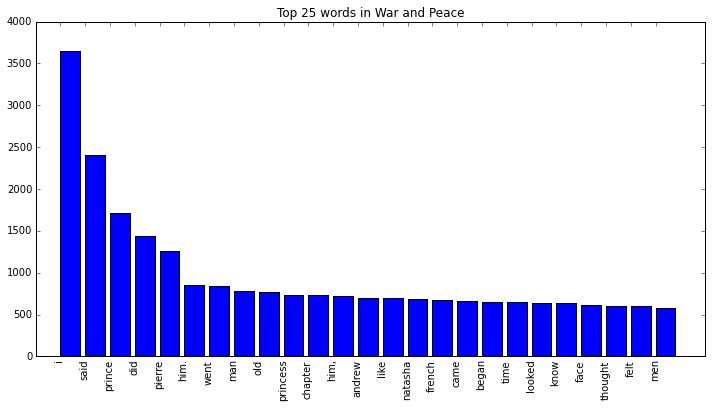

In [3]:
x,y = zip(*top_words)

plt.figure(figsize=(12,6))
plt.bar(xrange(len(x)), y)
plt.xlim((-1, len(x) + 1))
plt.title("Top {} words in War and Peace".format(len(x)))
plt.xticks(xrange(len(x)), x, rotation='vertical')
plt.show()
